# Lending Club - Loan Approval Process Optimization

# 2. Exploratory Data Analysis 

## 2.1 Imports

In [1]:
# Import the libraries necessary for the current task
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os

# pandas Configuration
pd.set_option("max_rows", 120)
pd.set_option("max_columns", 120)
pd.set_option("display.max_colwidth", None)

## 2.2 Data

In [2]:
# Load the CSV data
LC_data = pd.read_csv(r"C:\Users\lastr\Desktop\GitHub\Lending_Club_Capstone\data\lending_club_loans_cleaned.csv")

In [3]:
# Summary of the data
LC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39239 non-null  float64
 1   term                    39239 non-null  object 
 2   installment             39239 non-null  float64
 3   grade                   39239 non-null  object 
 4   emp_length              38182 non-null  object 
 5   home_ownership          39239 non-null  object 
 6   annual_inc              39239 non-null  float64
 7   verification_status     39239 non-null  object 
 8   loan_type               39239 non-null  int64  
 9   purpose                 39239 non-null  object 
 10  title                   39228 non-null  object 
 11  addr_state              39239 non-null  object 
 12  dti                     39239 non-null  float64
 13  delinq_2yrs             39239 non-null  float64
 14  earliest_cr_line        39239 non-null

In [4]:
# First 5 entries of the data
LC_data.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_type,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_range_avg
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0,732.0


## 2.3 Data Exploration

In [5]:
# Data types present in the data frame
LC_data.dtypes.value_counts()

float64    14
object     11
int64       1
dtype: int64

### 2.3.1 Object Features

In [6]:
# Examine the object features
obj_features = LC_data.select_dtypes(include=["object"])
obj_features.iloc[0]

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object

In [7]:
# Examine the feature values
for col in obj_features.columns:
    print(obj_features[col].value_counts().sort_index())
    print()

 36 months    29096
 60 months    10143
Name: term, dtype: int64

A    10064
B    11878
C     7985
D     5213
E     2772
F     1016
G      311
Name: grade, dtype: int64

1 year       3214
10+ years    8717
2 years      4349
3 years      4054
4 years      3394
5 years      3250
6 years      2202
7 years      1742
8 years      1459
9 years      1245
< 1 year     4556
Name: emp_length, dtype: int64

MORTGAGE    17396
NONE            3
OTHER          98
OWN          3028
RENT        18714
Name: home_ownership, dtype: int64

Not Verified       16845
Source Verified     9868
Verified           12526
Name: verification_status, dtype: int64

car                    1536
credit_card            5076
debt_consolidation    18370
educational             325
home_improvement       2949
house                   372
major_purchase         2184
medical                 690
moving                  582
other                  3937
renewable_energy        103
small_business         1796
vacation              

__Feature Containing Numerical Values:__
* __revol_util__

__Features Containing Categorical Values:__
* __term/grade/emp_length/home_ownership/verification_status/purpose/title/addr_state__

In [8]:
# Remove % sign and convert revol_util to numerical data type
LC_data["revol_util"] = LC_data["revol_util"].str.replace("%", "").astype("float")

#### 2.3.1.1 Categorical Features

__Features with Similar Values:__
* __purpose/title__

In [9]:
# Compare purpose and title for redundancy
similar_features = ["purpose", "title"]

for feature in similar_features:
    print("Feature: ", feature)
    print(LC_data[feature].value_counts())
    print()

Feature:  purpose
debt_consolidation    18370
credit_card            5076
other                  3937
home_improvement       2949
major_purchase         2184
small_business         1796
car                    1536
wedding                 941
medical                 690
moving                  582
vacation                378
house                   372
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Feature:  title
Debt Consolidation                               2144
Debt Consolidation Loan                          1671
Personal Loan                                     650
Consolidation                                     502
debt consolidation                                495
                                                 ... 
Land Improvement Loan                               1
I am requesting a Consolidation Loan.               1
Credit Card buster                                  1
Consolidating high interest credit card loans       1
Movin

__purpose__ and __title__ are indeed redundant features.
__purpose__ is more concise between the two, and thus __title__ will be removed.

In [10]:
# Drop title column
LC_data.drop(["title"], axis=1, inplace=True)

__Ordinal Features:__
* __grade/emp_length__

In [11]:
# Examine the ordinal features: grade, emp_length
print(LC_data["grade"].unique())
print(LC_data["emp_length"].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [12]:
# Convert grade and emp_length values to numerical
# Assume nan values for emp_length to be 0
mapping_dict = {"grade": 
               {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}, 
               "emp_length": 
               {"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
                "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10, nan: 0}}

LC_data = LC_data.replace(mapping_dict)

In [13]:
# Check grade and emp_length columns again
LC_data[["grade", "emp_length"]].head()

,grade,emp_length
0,1,10
1,2,0
2,2,10
3,2,10
4,0,3


### 2.3.2 Feature Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

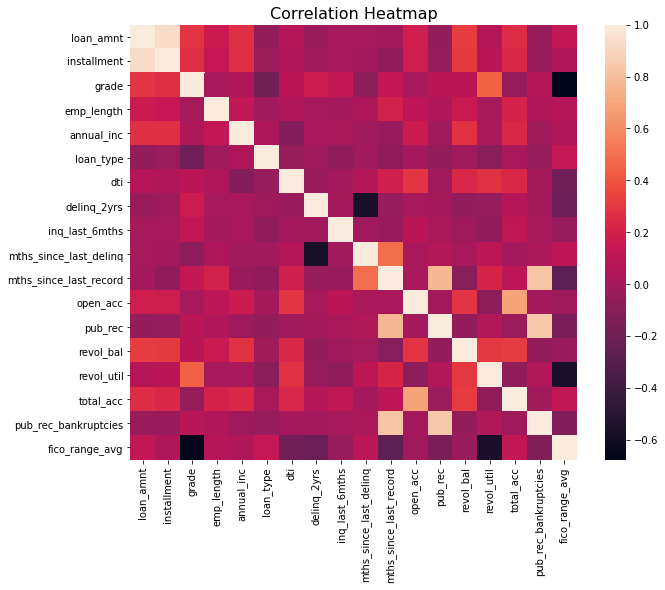

In [14]:
# Visualize correlations using a heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
sns.heatmap(LC_data.corr(), xticklabels=True, yticklabels=True, ax=ax)
ax.set_title("Correlation Heatmap", fontsize=16)

__Notable Correlations:__ 

__loan_amnt/installment__, __mths_since_last_delinq/delinq_2yrs__, __mths_since_last_delinq/mths_since_last_record__,
__mths_since_last_record/pub_rec__, __mths_since_last_record/pub_rec_bankruptcies__, __open_acc/total_acc__,
__pub_rec/pub_rec_bankruptcies__, __fico_range_avg/grade__, __fico_range_avg/revol_util__

It is rather difficult to ascribe much significance to many of these correlations,
since their high values are attributable to features which are intrinsically closely associated with each other.

#### 2.3.2.1 Loan Type Correlations

In [15]:
# Display correlations with respect to loan_type
loan_type_corr = LC_data.corr()["loan_type"].sort_values()

print("Positive Correlations\n", loan_type_corr[loan_type_corr > 0])
print("\nNegative Correlations\n", loan_type_corr[loan_type_corr < 0])

Positive Correlations
 open_acc          0.009852
total_acc         0.022763
annual_inc        0.041037
fico_range_avg    0.129900
loan_type         1.000000
Name: loan_type, dtype: float64

Negative Correlations
 grade                    -0.196132
revol_util               -0.099481
inq_last_6mths           -0.071420
mths_since_last_record   -0.061872
loan_amnt                -0.055406
pub_rec                  -0.050853
pub_rec_bankruptcies     -0.047914
dti                      -0.043841
installment              -0.026270
delinq_2yrs              -0.020446
emp_length               -0.006077
revol_bal                -0.005872
mths_since_last_delinq   -0.005172
Name: loan_type, dtype: float64


#### 2.3.2.2 Debt to Income Ratio Correlations

In [16]:
# Display correlations with respect to dti
dti_corr = LC_data.corr()['dti'].sort_values()

print("Positive Correlations\n", dti_corr[dti_corr > 0])
print("\nNegative Correlations\n", dti_corr[dti_corr < 0])

Positive Correlations
 inq_last_6mths            0.001593
pub_rec_bankruptcies      0.006000
emp_length                0.052040
installment               0.053444
loan_amnt                 0.064965
mths_since_last_delinq    0.067053
grade                     0.095885
mths_since_last_record    0.186400
revol_bal                 0.228399
total_acc                 0.229678
revol_util                0.278057
open_acc                  0.288225
dti                       1.000000
Name: dti, dtype: float64

Negative Correlations
 fico_range_avg   -0.198778
annual_inc       -0.122029
loan_type        -0.043841
delinq_2yrs      -0.033831
pub_rec          -0.004413
Name: dti, dtype: float64


#### 2.3.2.3 Relationship between Term and Loan Amount

Text(0, 0.5, 'Loan Amount')

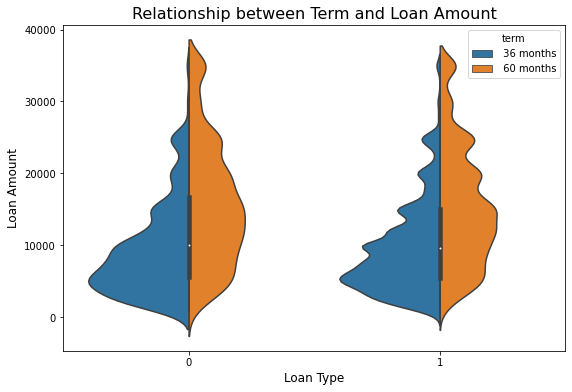

In [17]:
# Visualize the relationship between term and loan_amnt
fig = plt.figure(figsize=(9,6))
sns.violinplot(x="loan_type", y="loan_amnt", data=LC_data, hue="term", split=True)
plt.title("Relationship between Term and Loan Amount", fontsize=16)
plt.xlabel("Loan Type", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)

Regardless of the loan type, the loan amount tends to be higher with longer term.

#### 2.3.2.4 Annual Income Correlations

In [18]:
# Correlations with respect to annual_inc
income_corr = LC_data.corr()["annual_inc"].sort_values()

print("Positive Correlations\n", income_corr[income_corr > 0])
print("\nNegative Correlations\n", income_corr[income_corr < 0])

Positive Correlations
 revol_util        0.017821
delinq_2yrs       0.022435
inq_last_6mths    0.035088
loan_type         0.041037
fico_range_avg    0.050360
grade             0.053621
emp_length        0.121384
open_acc          0.157662
total_acc         0.235289
installment       0.269573
loan_amnt         0.270511
revol_bal         0.279101
annual_inc        1.000000
Name: annual_inc, dtype: float64

Negative Correlations
 dti                      -0.122029
mths_since_last_record   -0.031489
pub_rec                  -0.018473
pub_rec_bankruptcies     -0.016842
mths_since_last_delinq   -0.007709
Name: annual_inc, dtype: float64


#### 2.3.2.5 State-wide Loan Type Summary

Text(0.5, 1.0, 'Number of Bad Loans per State')

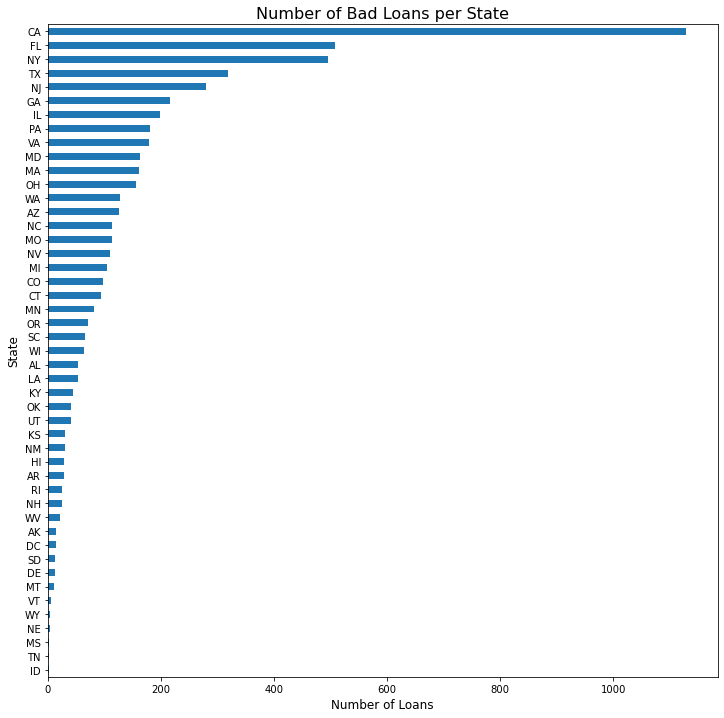

In [19]:
# State-wide Bad Loans
fig = plt.figure(figsize=(12,12))
LC_data[LC_data["loan_type"]==0].groupby("addr_state")["loan_type"].count().sort_values().plot(kind="barh")
plt.xlabel("Number of Loans", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Number of Bad Loans per State", fontsize=16)

Text(0.5, 1.0, 'Number of Good Loans per State')

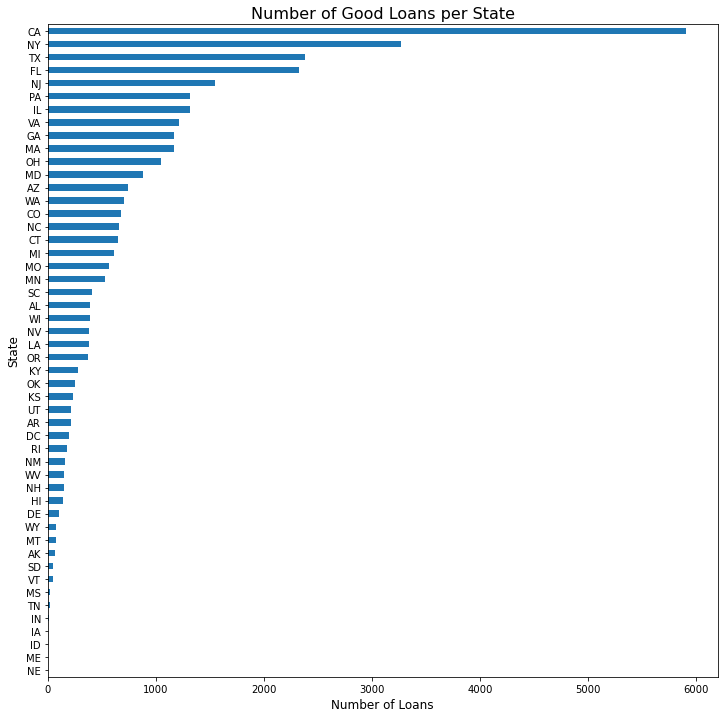

In [20]:
# State-wide Good Loans
fig = plt.figure(figsize=(12,12))
LC_data[LC_data["loan_type"]==1].groupby("addr_state")["loan_type"].count().sort_values().plot(kind="barh")
plt.xlabel("Number of Loans", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Number of Good Loans per State", fontsize=16)

It appears that the states with highest number of good loans and bad loans are mostly the same.

Hence, the state cannot be considered as a useful feature for determining the loan type.

#### 2.3.2.6 Grade Correlations

In [21]:
# Correlations with respect to grade
grade_corr = LC_data.corr()['grade'].sort_values()

print("Positive Correlations\n", grade_corr[grade_corr > 0])
print("\nNegative Correlations\n", grade_corr[grade_corr < 0])

Positive Correlations
 emp_length                0.011224
open_acc                  0.011512
annual_inc                0.053621
pub_rec_bankruptcies      0.078640
revol_bal                 0.091911
pub_rec                   0.092898
dti                       0.095885
inq_last_6mths            0.116250
mths_since_last_record    0.123759
delinq_2yrs               0.163125
installment               0.264973
loan_amnt                 0.289515
revol_util                0.444170
grade                     1.000000
Name: grade, dtype: float64

Negative Correlations
 fico_range_avg           -0.677051
loan_type                -0.196132
mths_since_last_delinq   -0.077104
total_acc                -0.038651
Name: grade, dtype: float64


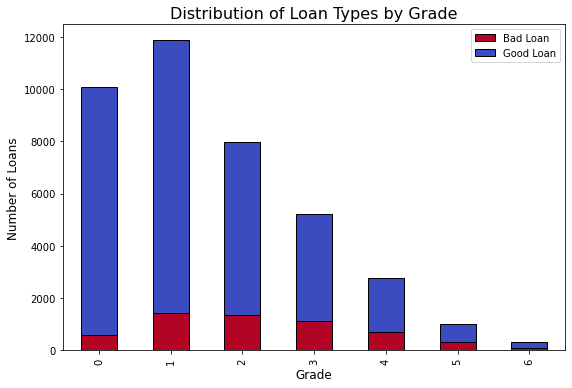

In [22]:
# Visualize distribution of loan types by grade
loans_by_grade = LC_data.groupby(["grade", "loan_type"]).size()
loan_type = ["Bad Loan", "Good Loan"]

fig, ax = plt.subplots(figsize=(9,6))
cmap = plt.cm.coolwarm_r
loans_by_grade.unstack().plot(kind="bar", stacked=True, colormap=cmap, ax=ax, grid=False, edgecolor="black")
plt.title("Distribution of Loan Types by Grade", fontsize=16)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
ax.legend(loan_type)

Bad loans appear to be relatively high among grade 1, 2, and 3.
Ideally, the number of bad loans should be increasing with declining grade.

## 2.4 Data Preparation for Modeling

### 2.4.1 Data Cleaning

In [23]:
# Summary of the data
LC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39239 non-null  float64
 1   term                    39239 non-null  object 
 2   installment             39239 non-null  float64
 3   grade                   39239 non-null  int64  
 4   emp_length              39239 non-null  int64  
 5   home_ownership          39239 non-null  object 
 6   annual_inc              39239 non-null  float64
 7   verification_status     39239 non-null  object 
 8   loan_type               39239 non-null  int64  
 9   purpose                 39239 non-null  object 
 10  addr_state              39239 non-null  object 
 11  dti                     39239 non-null  float64
 12  delinq_2yrs             39239 non-null  float64
 13  earliest_cr_line        39239 non-null  object 
 14  inq_last_6mths          39239 non-null

In [24]:
# Check for the missing values
LC_data.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_type                     0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25352
mths_since_last_record    36466
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
last_credit_pull_d            2
pub_rec_bankruptcies        697
fico_range_avg                0
dtype: int64

__mths_since_last_delinq__, __mths_since_last_record__ will be dropped, as they contain too many missing values
and have not displayed any significant correlations with other features.

In [25]:
# Drop mths_since_last_delinq, mths_since_last_record
LC_data.drop(["mths_since_last_delinq", "mths_since_last_record"], axis=1, inplace=True)

### 2.4.2 One-Hot Encoding for Nominal Features

In [26]:
# Create dummy variables for nominal features: term, home_ownership, verification_status, purpose
nominal_features = ["term", "home_ownership", "verification_status", "purpose"]
dummies_df = pd.get_dummies(LC_data[nominal_features])
LC_data = pd.concat([LC_data, dummies_df], axis=1)
LC_data = LC_data.drop(nominal_features, axis=1)

In [27]:
# Check the first 5 entries of the modified data frame
LC_data.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_type,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_range_avg,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,1,10,24000.0,1,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,Sep-2016,0.0,737.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,2,0,30000.0,0,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,Sep-2016,0.0,742.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,2,10,12252.0,1,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,Sep-2016,0.0,737.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,2,10,49200.0,1,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,Apr-2016,0.0,692.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,156.46,0,3,36000.0,1,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,Jan-2016,0.0,732.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# Summary of the modified data frame
LC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39239 non-null  float64
 1   installment                          39239 non-null  float64
 2   grade                                39239 non-null  int64  
 3   emp_length                           39239 non-null  int64  
 4   annual_inc                           39239 non-null  float64
 5   loan_type                            39239 non-null  int64  
 6   addr_state                           39239 non-null  object 
 7   dti                                  39239 non-null  float64
 8   delinq_2yrs                          39239 non-null  float64
 9   earliest_cr_line                     39239 non-null  object 
 10  inq_last_6mths                       39239 non-null  float64
 11  open_acc                    

## 2.4 Save Data

In [29]:
data_path = r"C:\Users\lastr\Desktop\GitHub\Lending_Club_Capstone\data"
data_path_lending_club_loans = os.path.join(data_path, "lending_club_loans_EDA.csv")

if not os.path.exists(data_path_lending_club_loans):
    LC_data.to_csv(data_path_lending_club_loans, index=False)